# ALBERTA

In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

## FBPROPHET

# Breton Mean Temp (°C)

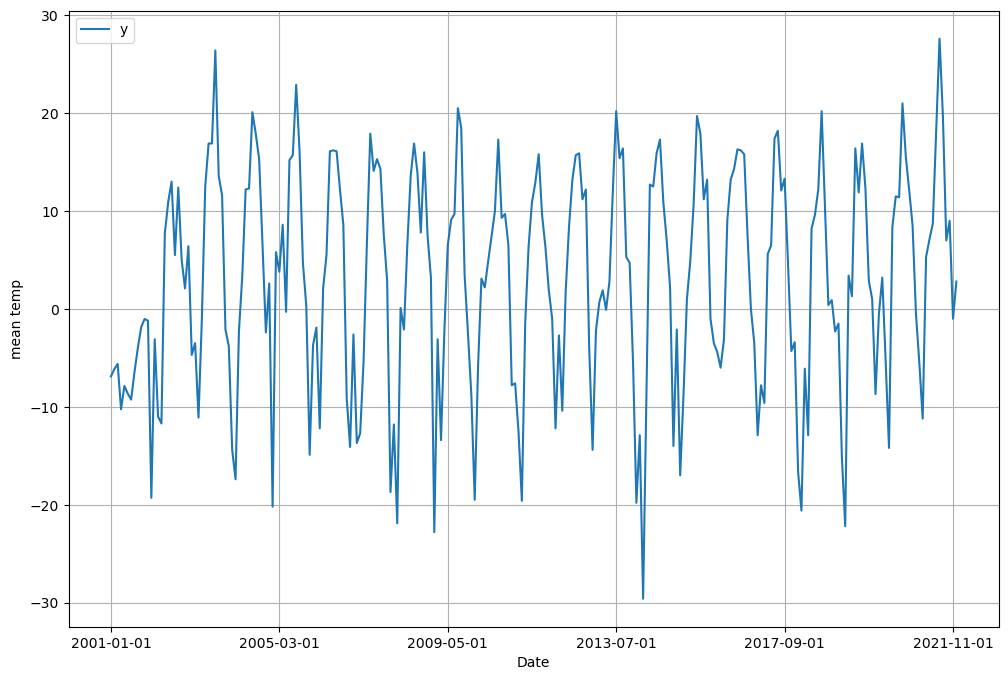

In [47]:
dataAC = pd.read_csv('Final.csv')
prophet_mean_temp_breton = dataAC[dataAC['Station Name'] == 'Breton'][['Date', 'MeanTemp']]
prophet_mean_temp_breton.set_index('Date', inplace=True)
prophet_mean_temp_breton=prophet_mean_temp_breton.reset_index()
# Step 3: Preprocess data if needed (rename columns to 'ds' and 'y')
prophet_mean_temp_breton.rename(columns={'Date': 'ds', 'MeanTemp': 'y'}, inplace=True)
model = Prophet()
ax=prophet_mean_temp_breton.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('mean temp')
ax.set_xlabel('Date')
plt.grid()
plt.show()


In [48]:
model.fit(prophet_mean_temp_breton)


14:52:47 - cmdstanpy - INFO - Chain [1] start processing
14:52:47 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,1.398171,-20.001064,-4.597246,1.398171,1.398171,-13.572216,-13.572216,-13.572216,-13.572216,-13.572216,-13.572216,0.0,0.0,0.0,-12.174045
1,2001-02-01,1.412528,-17.705872,-2.379744,1.412528,1.412528,-11.317325,-11.317325,-11.317325,-11.317325,-11.317325,-11.317325,0.0,0.0,0.0,-9.904797
2,2001-03-01,1.425495,-17.527737,-1.676101,1.425495,1.425495,-11.017551,-11.017551,-11.017551,-11.017551,-11.017551,-11.017551,0.0,0.0,0.0,-9.592056
3,2001-04-01,1.439852,-10.206641,4.856580,1.439852,1.439852,-4.359200,-4.359200,-4.359200,-4.359200,-4.359200,-4.359200,0.0,0.0,0.0,-2.919349
4,2001-05-01,1.453745,-2.806372,12.777327,1.453745,1.453745,3.320477,3.320477,3.320477,3.320477,3.320477,3.320477,0.0,0.0,0.0,4.774223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,5.017507,10.490274,25.558091,5.017480,5.017530,12.919227,12.919227,12.919227,12.919227,12.919227,12.919227,0.0,0.0,0.0,17.936734
260,2022-09-01,5.031714,5.412770,21.589393,5.031679,5.031743,8.634735,8.634735,8.634735,8.634735,8.634735,8.634735,0.0,0.0,0.0,13.666449
261,2022-10-01,5.045463,1.066388,17.274700,5.045422,5.045498,4.018851,4.018851,4.018851,4.018851,4.018851,4.018851,0.0,0.0,0.0,9.064314
262,2022-11-01,5.059670,-5.679778,10.539062,5.059622,5.059711,-2.701655,-2.701655,-2.701655,-2.701655,-2.701655,-2.701655,0.0,0.0,0.0,2.358015


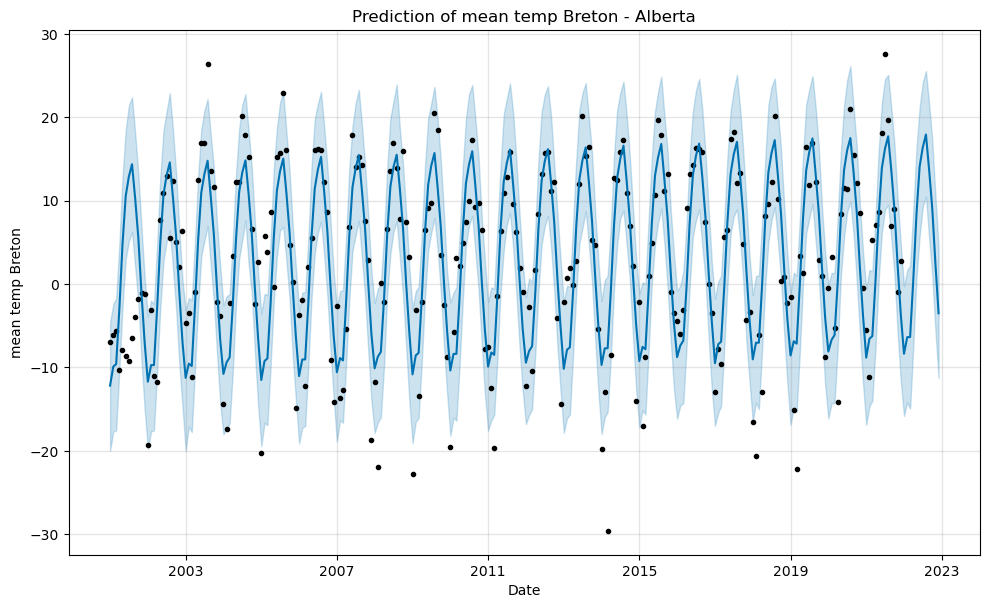

RMSE: 6.166523395111141
MAE: 4.623800002634723
MSE: 38.026010782453035


In [50]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of mean temp Breton - Alberta")
plt.xlabel("Date")
plt.ylabel("mean temp Breton")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_mean_temp_breton['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)


# Stavely Mean Temp (°C)

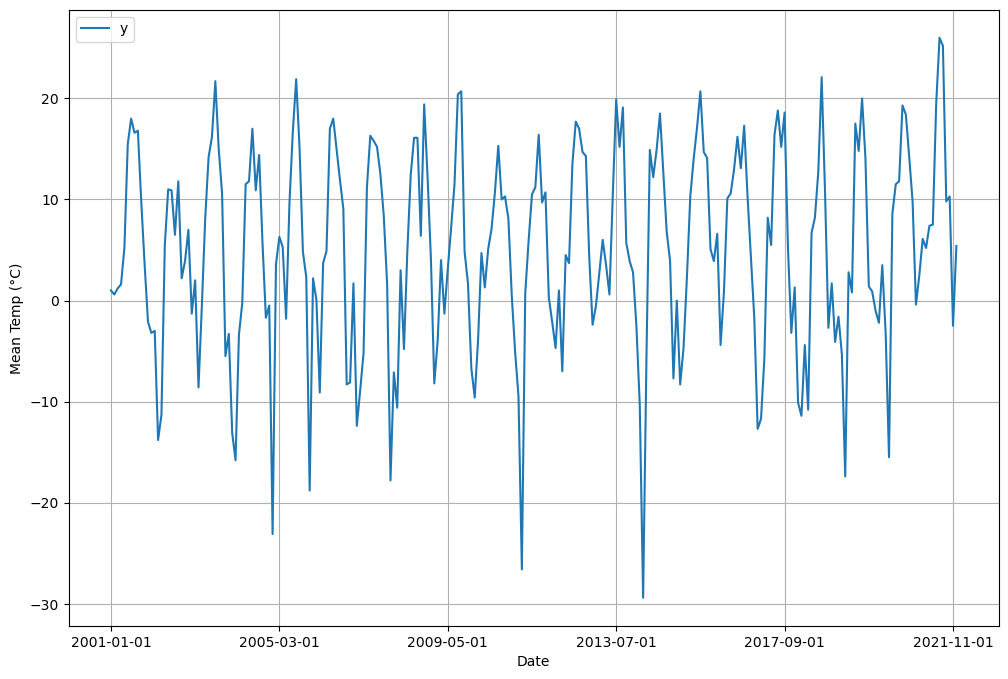

In [52]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataAT = pd.read_csv('Final.csv')

# Filter data for the specified station and column
prophet_mean_temp_stavely = dataAT[dataAT['Station Name'] == 'Stavely'][['Date', 'MeanTemp']]

# Rename columns to 'ds' and 'y'
prophet_mean_temp_stavely.rename(columns={'Date': 'ds', 'MeanTemp': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_mean_temp_stavely.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Mean Temp (°C)')
ax.set_xlabel('Date')
plt.grid()
plt.show()

# Fit the model




In [53]:
model.fit(prophet_mean_temp_stavely)


14:53:30 - cmdstanpy - INFO - Chain [1] start processing
14:53:30 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,4.107121,-12.565516,2.360469,4.107121,4.107121,-9.599089,-9.599089,-9.599089,-9.599089,-9.599089,-9.599089,0.0,0.0,0.0,-5.491968
1,2001-02-01,4.115285,-12.154569,1.632935,4.115285,4.115285,-9.462718,-9.462718,-9.462718,-9.462718,-9.462718,-9.462718,0.0,0.0,0.0,-5.347434
2,2001-03-01,4.122658,-13.466518,0.558006,4.122658,4.122658,-10.287738,-10.287738,-10.287738,-10.287738,-10.287738,-10.287738,0.0,0.0,0.0,-6.165080
3,2001-04-01,4.130821,-8.356239,5.967589,4.130821,4.130821,-5.301294,-5.301294,-5.301294,-5.301294,-5.301294,-5.301294,0.0,0.0,0.0,-1.170472
4,2001-05-01,4.138722,-1.833656,12.557564,4.138722,4.138722,1.191670,1.191670,1.191670,1.191670,1.191670,1.191670,0.0,0.0,0.0,5.330391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,6.183377,11.302693,26.058769,6.183376,6.183378,12.130079,12.130079,12.130079,12.130079,12.130079,12.130079,0.0,0.0,0.0,18.313457
260,2022-09-01,6.191544,7.866636,22.036081,6.191543,6.191545,8.870650,8.870650,8.870650,8.870650,8.870650,8.870650,0.0,0.0,0.0,15.062194
261,2022-10-01,6.199448,2.703933,17.159623,6.199447,6.199449,3.201107,3.201107,3.201107,3.201107,3.201107,3.201107,0.0,0.0,0.0,9.400554
262,2022-11-01,6.207615,-3.930950,10.759433,6.207613,6.207616,-2.952190,-2.952190,-2.952190,-2.952190,-2.952190,-2.952190,0.0,0.0,0.0,3.255425


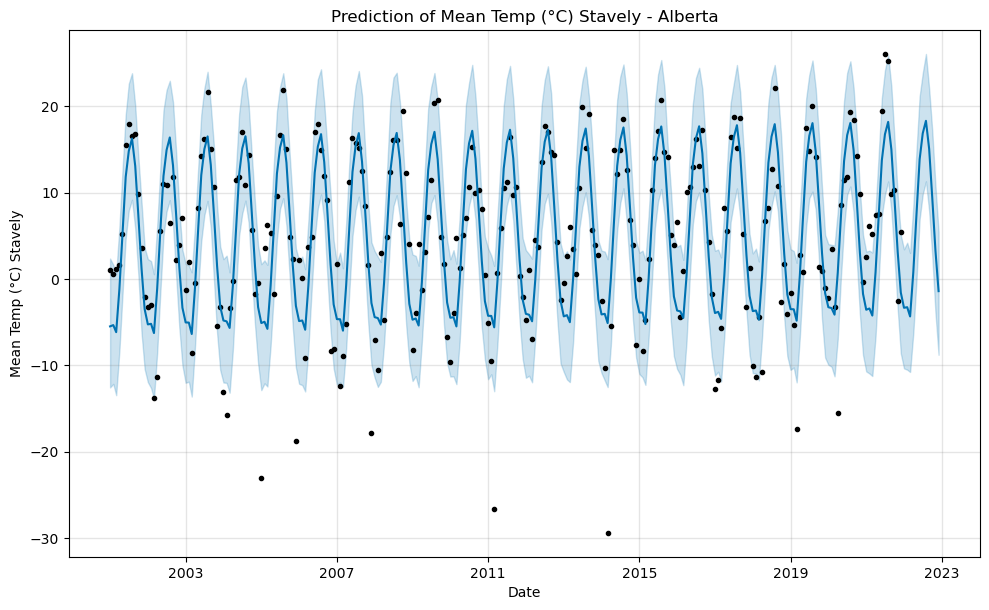

RMSE: 5.558580828563856
MAE: 4.150342316993859
MSE: 30.89782082767764


In [55]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Mean Temp (°C) Stavely - Alberta")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C) Stavely")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_mean_temp_stavely['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

## Milk River Mean Temp (°C)

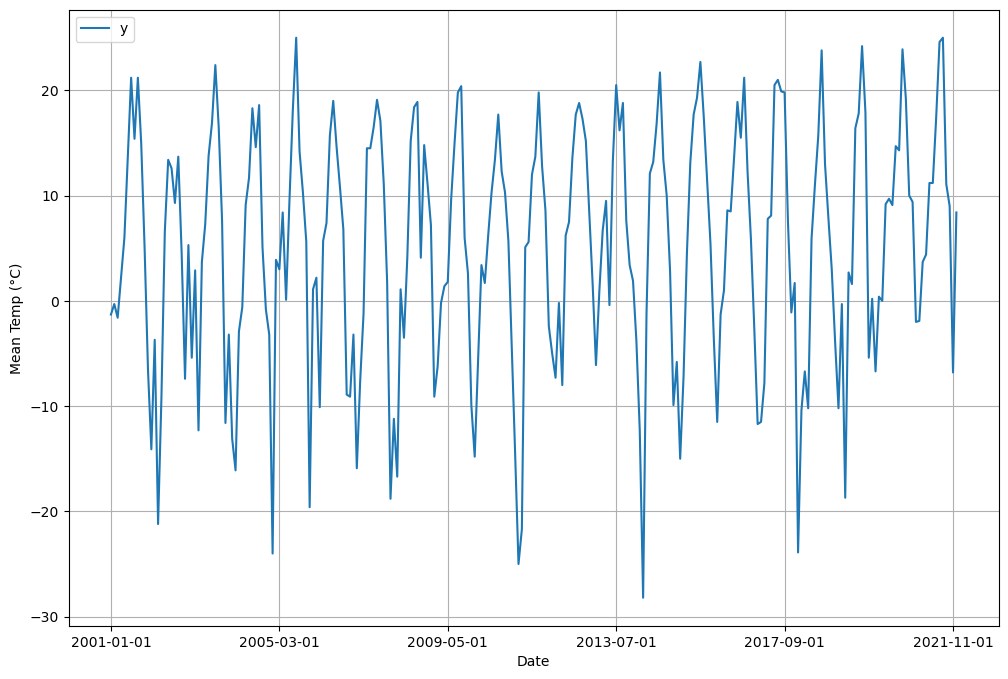

In [59]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataMA = pd.read_csv('Final.csv')

# Filter data for the specified station and column
prophet_mean_temp_Milkriver = dataMA[dataMA['Station Name'] == 'Milk River'][['Date', 'MeanTemp']]

# Reset index to avoid issues with Prophet
prophet_mean_temp_Milkriver.reset_index(drop=True, inplace=True)

# Rename columns to 'ds' and 'y'
prophet_mean_temp_Milkriver.rename(columns={'Date': 'ds', 'MeanTemp': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_agriculture_Milkriver.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Mean Temp (°C)')
ax.set_xlabel('Date')
plt.grid()
plt.show()



In [60]:

model.fit(prophet_mean_temp_Milkriver)


14:55:27 - cmdstanpy - INFO - Chain [1] start processing
14:55:27 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,3.699755,-18.218625,-2.992966,3.699755,3.699755,-14.669448,-14.669448,-14.669448,-14.669448,-14.669448,-14.669448,0.0,0.0,0.0,-10.969692
1,2001-02-01,3.713196,-14.915311,-0.836471,3.713196,3.713196,-11.425151,-11.425151,-11.425151,-11.425151,-11.425151,-11.425151,0.0,0.0,0.0,-7.711955
2,2001-03-01,3.725336,-14.775153,0.365857,3.725336,3.725336,-11.104689,-11.104689,-11.104689,-11.104689,-11.104689,-11.104689,0.0,0.0,0.0,-7.379353
3,2001-04-01,3.738777,-5.674271,9.160599,3.738777,3.738777,-2.306689,-2.306689,-2.306689,-2.306689,-2.306689,-2.306689,0.0,0.0,0.0,1.432088
4,2001-05-01,3.751785,-2.672349,12.285508,3.751785,3.751785,1.606300,1.606300,1.606300,1.606300,1.606300,1.606300,0.0,0.0,0.0,5.358084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,7.117214,14.178666,29.124230,7.117214,7.117214,14.134899,14.134899,14.134899,14.134899,14.134899,14.134899,0.0,0.0,0.0,21.252112
260,2022-09-01,7.130655,10.459053,24.642794,7.130655,7.130655,10.409550,10.409550,10.409550,10.409550,10.409550,10.409550,0.0,0.0,0.0,17.540204
261,2022-10-01,7.143662,3.403479,17.216476,7.143662,7.143662,3.468507,3.468507,3.468507,3.468507,3.468507,3.468507,0.0,0.0,0.0,10.612169
262,2022-11-01,7.157103,-3.766260,10.074745,7.157103,7.157103,-3.919131,-3.919131,-3.919131,-3.919131,-3.919131,-3.919131,0.0,0.0,0.0,3.237972


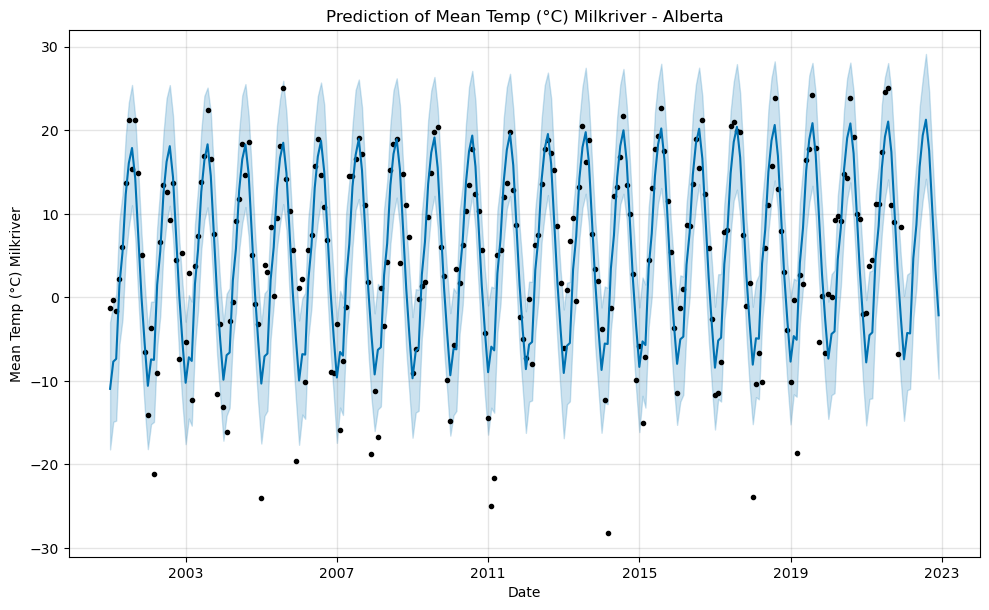

RMSE: 5.746736331870827
MAE: 4.288729932697448
MSE: 33.02497846804417


In [62]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Mean Temp (°C) Milkriver - Alberta")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C) Milkriver")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_mean_temp_Milkriver['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# British Columbia

# Burns Lake Mean Temp (°C)

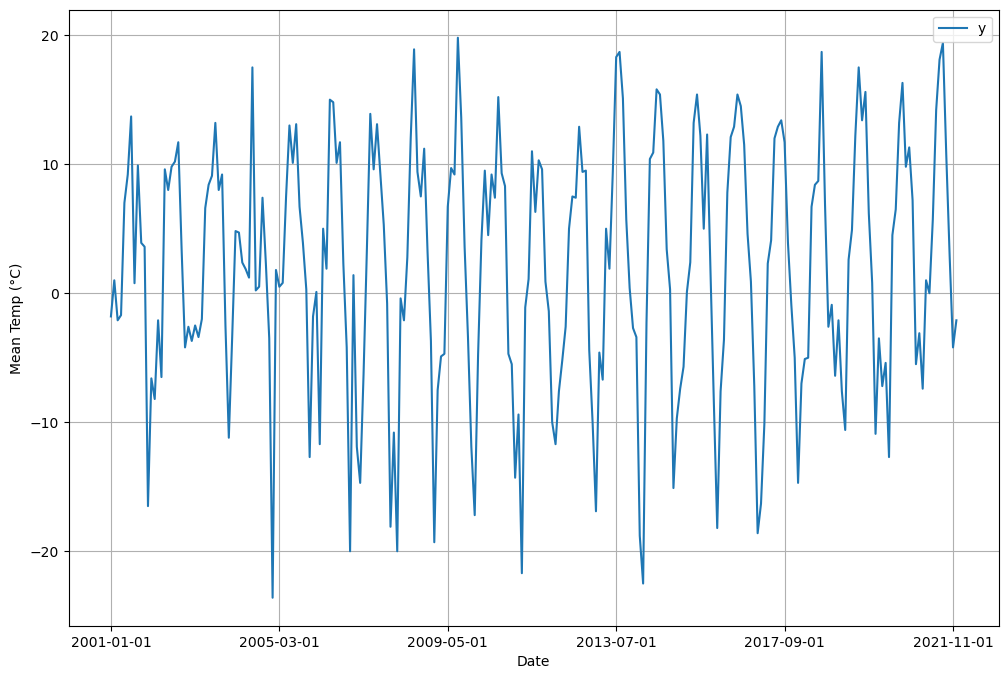

In [63]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataBC = pd.read_csv('FinalBC.csv')

# Filter data for the specified station and column
prophet_mean_temp_burnslake = dataBC[dataBC['Station Name'] == 'Burns Lake'][['Date', 'Mean Temp (°C)']]

# Rename columns to 'ds' and 'y'
prophet_mean_temp_burnslake.rename(columns={'Date': 'ds', 'Mean Temp (°C)': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_mean_temp_burnslake.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Mean Temp (°C)')
ax.set_xlabel('Date')
plt.grid()
plt.show()
    

In [64]:

model.fit(prophet_mean_temp_burnslake)


14:56:43 - cmdstanpy - INFO - Chain [1] start processing
14:56:43 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


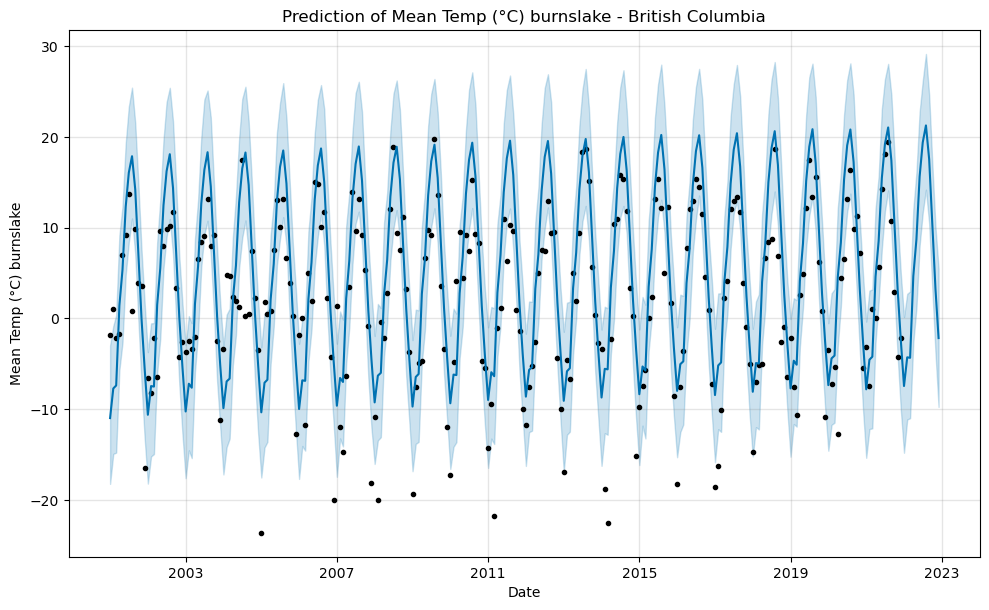

RMSE: 6.1996464385334
MAE: 5.015185824211733
MSE: 38.435615962819874


In [65]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Mean Temp (°C) burnslake - British Columbia")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C) burnslake")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_mean_temp_burnslake['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Kootenay Mean Temp (°C)

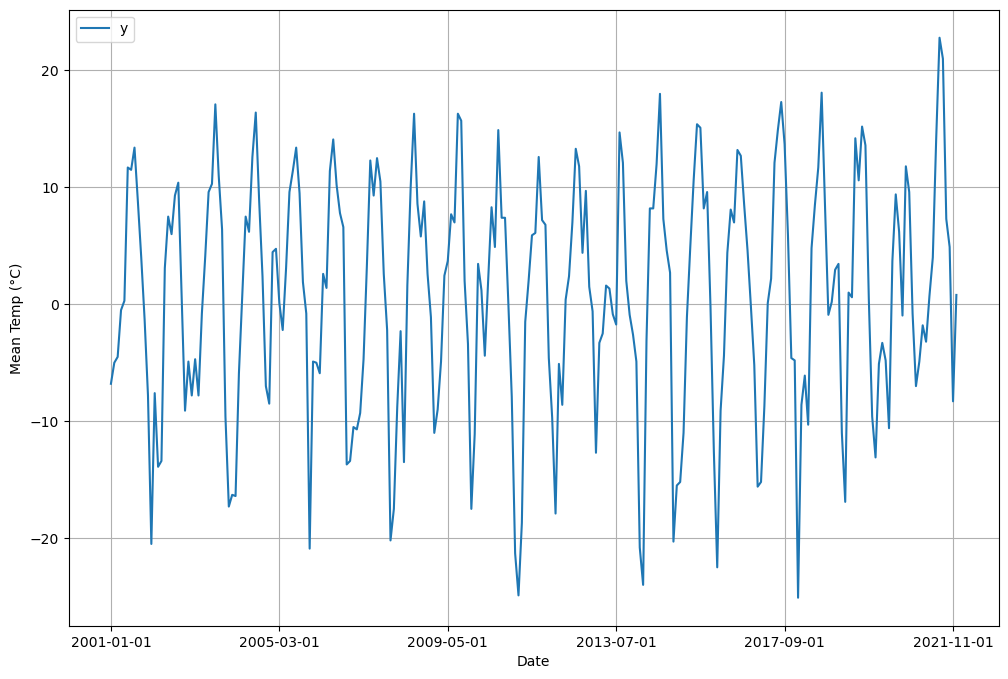

In [69]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataKT = pd.read_csv('FinalBC.csv')

# Filter data for the specified station and column
prophet_mean_temp_kootenay = dataKT[dataKT['Station Name'] == 'Kootenay'][['Date', 'Mean Temp (°C)']]

# Rename columns to 'ds' and 'y'
prophet_mean_temp_kootenay.rename(columns={'Date': 'ds', 'Mean Temp (°C)': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_mean_temp_kootenay.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Mean Temp (°C)')
ax.set_xlabel('Date')
plt.grid()
plt.show()

In [70]:
model.fit(prophet_mean_temp_kootenay)


14:57:59 - cmdstanpy - INFO - Chain [1] start processing
14:57:59 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,0.195420,-19.004335,-6.179787,0.195420,0.195420,-12.535658,-12.535658,-12.535658,-12.535658,-12.535658,-12.535658,0.0,0.0,0.0,-12.340239
1,2001-02-01,0.200805,-15.865995,-2.938749,0.200805,0.200805,-9.406959,-9.406959,-9.406959,-9.406959,-9.406959,-9.406959,0.0,0.0,0.0,-9.206154
2,2001-03-01,0.205669,-14.915214,-2.084522,0.205669,0.205669,-8.471691,-8.471691,-8.471691,-8.471691,-8.471691,-8.471691,0.0,0.0,0.0,-8.266022
3,2001-04-01,0.211054,-9.718785,3.299148,0.211054,0.211054,-3.303767,-3.303767,-3.303767,-3.303767,-3.303767,-3.303767,0.0,0.0,0.0,-3.092713
4,2001-05-01,0.216266,-3.941673,9.152229,0.216266,0.216266,2.652307,2.652307,2.652307,2.652307,2.652307,2.652307,0.0,0.0,0.0,2.868572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,1.564668,7.795258,21.115915,1.564668,1.564668,12.862095,12.862095,12.862095,12.862095,12.862095,12.862095,0.0,0.0,0.0,14.426763
260,2022-09-01,1.570053,3.500628,16.902413,1.570053,1.570053,8.587728,8.587728,8.587728,8.587728,8.587728,8.587728,0.0,0.0,0.0,10.157781
261,2022-10-01,1.575265,-1.323019,11.727072,1.575265,1.575265,3.923605,3.923605,3.923605,3.923605,3.923605,3.923605,0.0,0.0,0.0,5.498870
262,2022-11-01,1.580650,-9.092252,4.564754,1.580650,1.580650,-4.155476,-4.155476,-4.155476,-4.155476,-4.155476,-4.155476,0.0,0.0,0.0,-2.574826


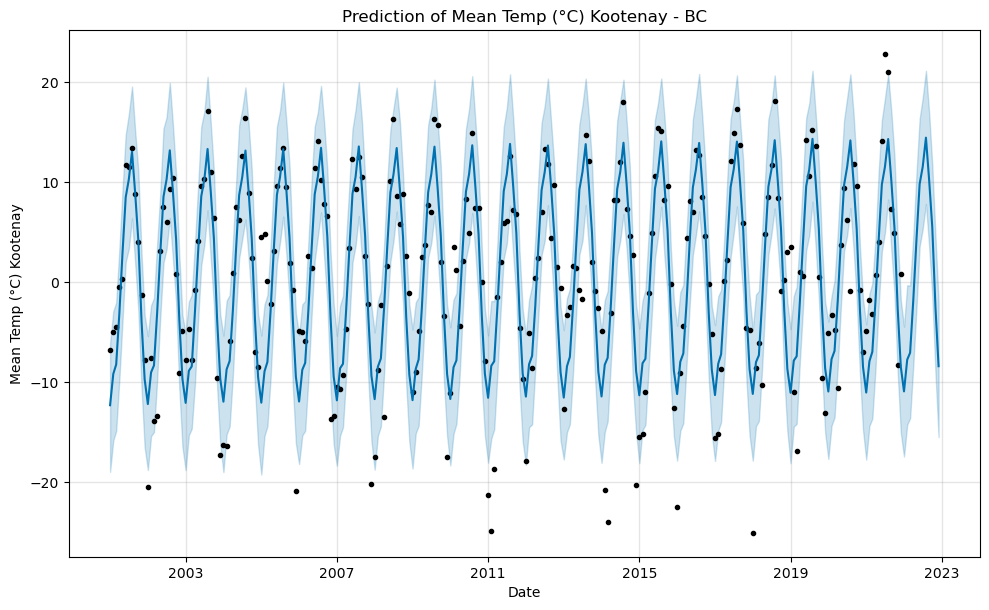

RMSE: 5.169201241941954
MAE: 3.860247943046447
MSE: 26.72064147969424


In [72]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Mean Temp (°C) Kootenay - BC")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C) Kootenay")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_mean_temp_kootenay['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Pemberton Mean Temp (°C)

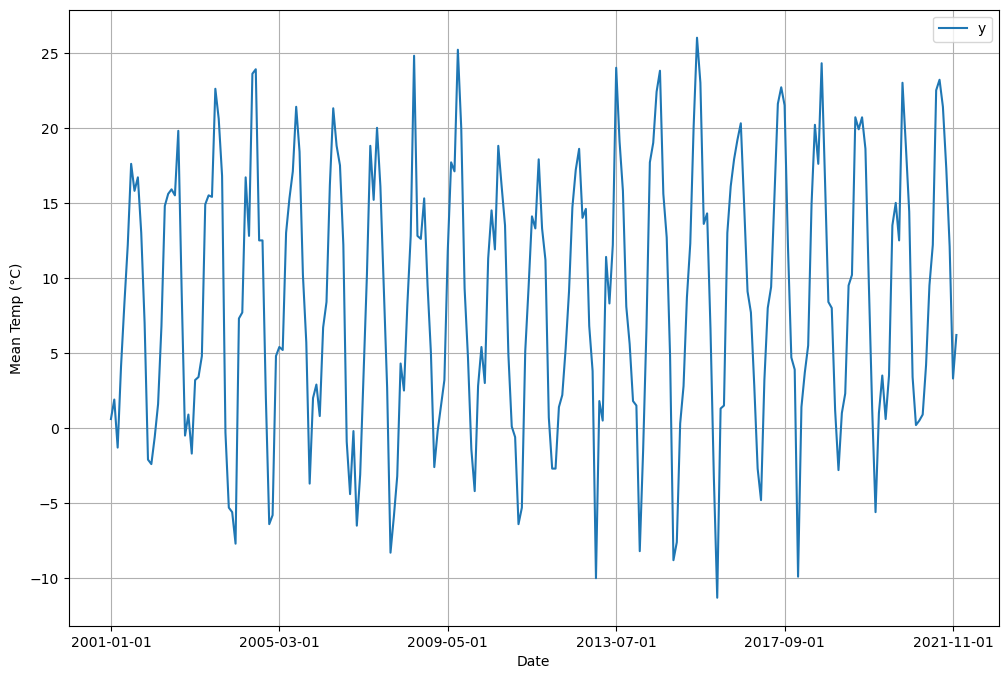

In [74]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataPB = pd.read_csv('FinalBC.csv')

# Filter data for the specified station and column
prophet_mean_temp_pemberton = dataPB[dataPB['Station Name'] == 'Pemberton'][['Date', 'Mean Temp (°C)']]

# Reset index to avoid issues with Prophet
prophet_mean_temp_pemberton.reset_index(drop=True, inplace=True)

# Rename columns to 'ds' and 'y'
prophet_mean_temp_pemberton.rename(columns={'Date': 'ds', 'Mean Temp (°C)': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_mean_temp_pemberton.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Mean Temp (°C)')
ax.set_xlabel('Date')
plt.grid()
plt.show()


In [75]:
model.fit(prophet_mean_temp_pemberton)


14:59:49 - cmdstanpy - INFO - Chain [1] start processing
14:59:49 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,8.388042,-9.060099,-0.775198,8.388042,8.388042,-13.398877,-13.398877,-13.398877,-13.398877,-13.398877,-13.398877,0.0,0.0,0.0,-5.010835
1,2001-02-01,8.394461,-5.993053,2.453072,8.394461,8.394461,-10.181987,-10.181987,-10.181987,-10.181987,-10.181987,-10.181987,0.0,0.0,0.0,-1.787525
2,2001-03-01,8.400259,-2.873452,5.145864,8.400259,8.400259,-7.176102,-7.176102,-7.176102,-7.176102,-7.176102,-7.176102,0.0,0.0,0.0,1.224157
3,2001-04-01,8.406679,1.486942,9.774535,8.406679,8.406679,-2.841737,-2.841737,-2.841737,-2.841737,-2.841737,-2.841737,0.0,0.0,0.0,5.564942
4,2001-05-01,8.412891,7.206602,15.469828,8.412891,8.412891,2.835180,2.835180,2.835180,2.835180,2.835180,2.835180,0.0,0.0,0.0,11.248071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-08-01,10.231847,17.321448,25.533502,10.231594,10.232092,11.248015,11.248015,11.248015,11.248015,11.248015,11.248015,0.0,0.0,0.0,21.479862
260,2022-09-01,10.239811,13.709492,22.094518,10.239488,10.240150,7.711113,7.711113,7.711113,7.711113,7.711113,7.711113,0.0,0.0,0.0,17.950924
261,2022-10-01,10.247518,9.030735,16.989632,10.247127,10.247928,2.738101,2.738101,2.738101,2.738101,2.738101,2.738101,0.0,0.0,0.0,12.985618
262,2022-11-01,10.255481,0.873845,8.896824,10.255007,10.255971,-5.206224,-5.206224,-5.206224,-5.206224,-5.206224,-5.206224,0.0,0.0,0.0,5.049258


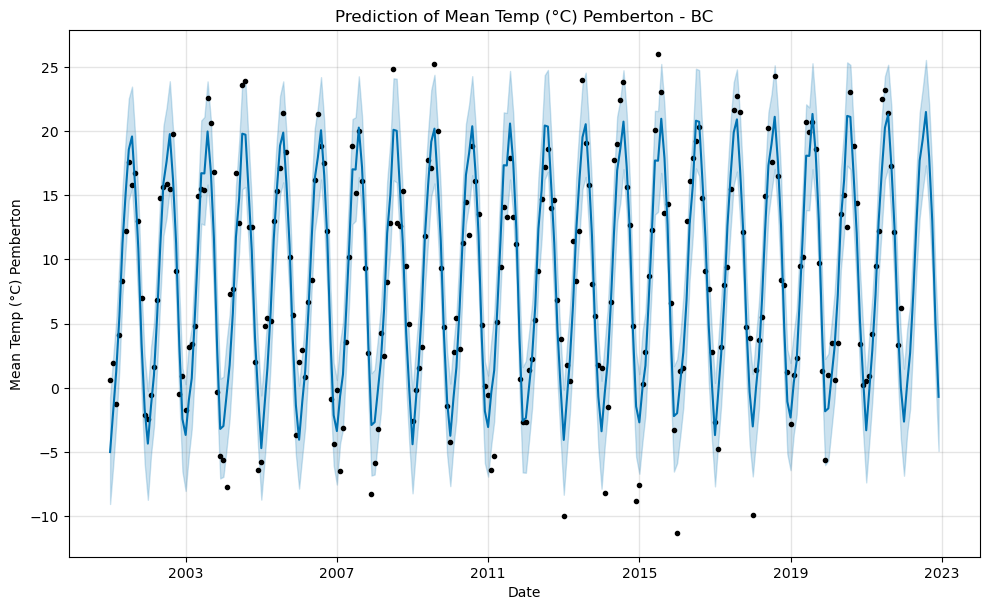

RMSE: 3.1691972241125685
MAE: 2.5886027550459656
MSE: 10.04381104532281


In [77]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Mean Temp (°C) Pemberton - BC")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C) Pemberton")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_mean_temp_pemberton['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# ONTARIO

# Dorion Mean Temp (°C)

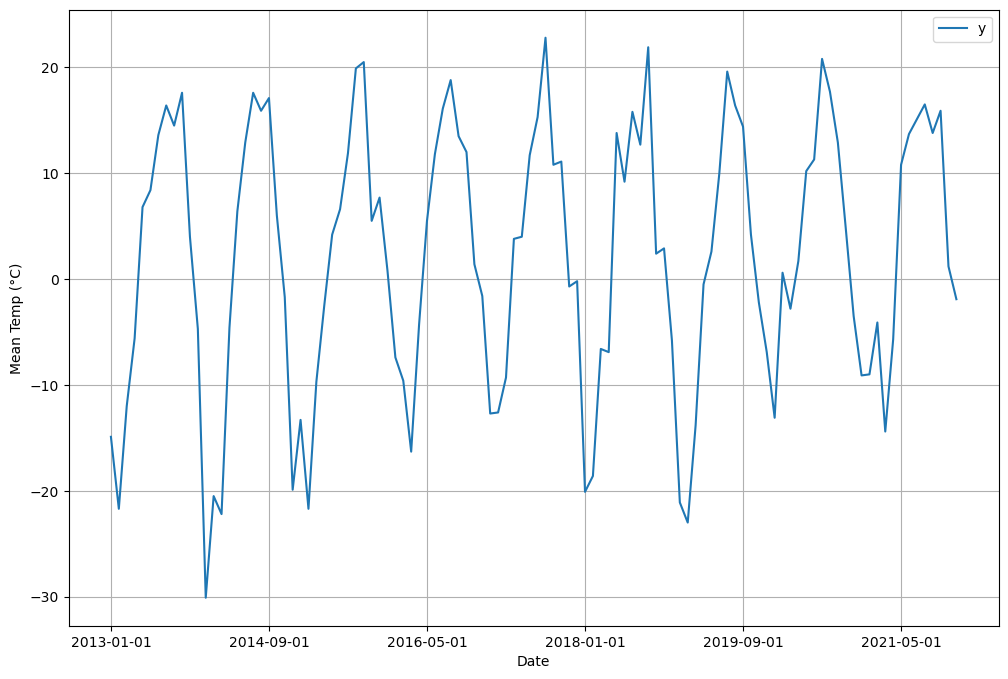

In [78]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataDP = pd.read_csv('FinalON.csv')

# Filter data for the specified station and column
prophet_mean_temp_dorion = dataDP[dataDP['Station Name'] == 'Dorion'][['Date', 'Mean Temp (Â°C)']]

# Rename columns to 'ds' and 'y'
prophet_mean_temp_dorion.rename(columns={'Date': 'ds', 'Mean Temp (Â°C)': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax =prophet_mean_temp_dorion.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Mean Temp (°C)')
ax.set_xlabel('Date')
plt.grid()
plt.show()



In [79]:
model.fit(prophet_mean_temp_dorion)


15:01:38 - cmdstanpy - INFO - Chain [1] start processing
15:01:38 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,0.957433,-22.348319,-11.339338,0.957433,0.957433,-18.034447,-18.034447,-18.034447,-18.034447,-18.034447,-18.034447,0.0,0.0,0.0,-17.077014
1,2013-02-01,0.984032,-21.525578,-10.664526,0.984032,0.984032,-17.026728,-17.026728,-17.026728,-17.026728,-17.026728,-17.026728,0.0,0.0,0.0,-16.042696
2,2013-03-01,1.008058,-18.891603,-7.320841,1.008058,1.008058,-14.100072,-14.100072,-14.100072,-14.100072,-14.100072,-14.100072,0.0,0.0,0.0,-13.092014
3,2013-04-01,1.034657,-9.744423,1.411315,1.034657,1.034657,-5.025350,-5.025350,-5.025350,-5.025350,-5.025350,-5.025350,0.0,0.0,0.0,-3.990693
4,2013-05-01,1.060399,0.318873,12.158901,1.060399,1.060399,4.834789,4.834789,4.834789,4.834789,4.834789,4.834789,0.0,0.0,0.0,5.895188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,4.088090,13.352699,24.387444,4.087694,4.088587,14.985260,14.985260,14.985260,14.985260,14.985260,14.985260,0.0,0.0,0.0,19.073350
116,2022-09-01,4.115935,12.207945,22.979884,4.115437,4.116521,13.126711,13.126711,13.126711,13.126711,13.126711,13.126711,0.0,0.0,0.0,17.242646
117,2022-10-01,4.142882,4.820829,16.197567,4.142277,4.143571,6.269345,6.269345,6.269345,6.269345,6.269345,6.269345,0.0,0.0,0.0,10.412227
118,2022-11-01,4.170727,-3.497879,8.000090,4.170032,4.171557,-1.449454,-1.449454,-1.449454,-1.449454,-1.449454,-1.449454,0.0,0.0,0.0,2.721273


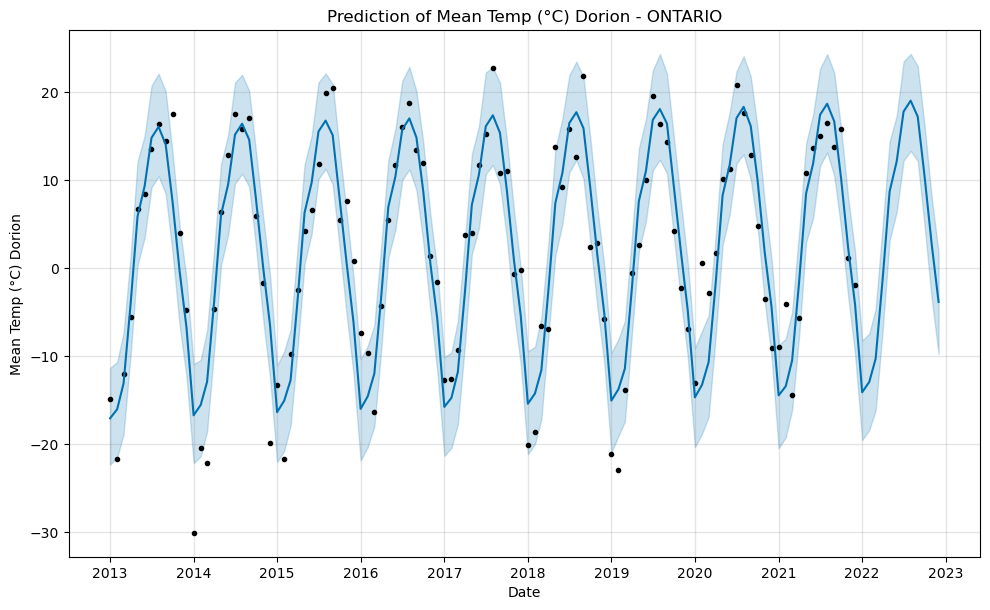

RMSE: 4.5827378435476005
MAE: 3.61987711511213
MSE: 21.001486142683316


In [81]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Mean Temp (°C) Dorion - ONTARIO")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C) Dorion")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_mean_temp_dorion['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Moosone Mean Temp (°C)

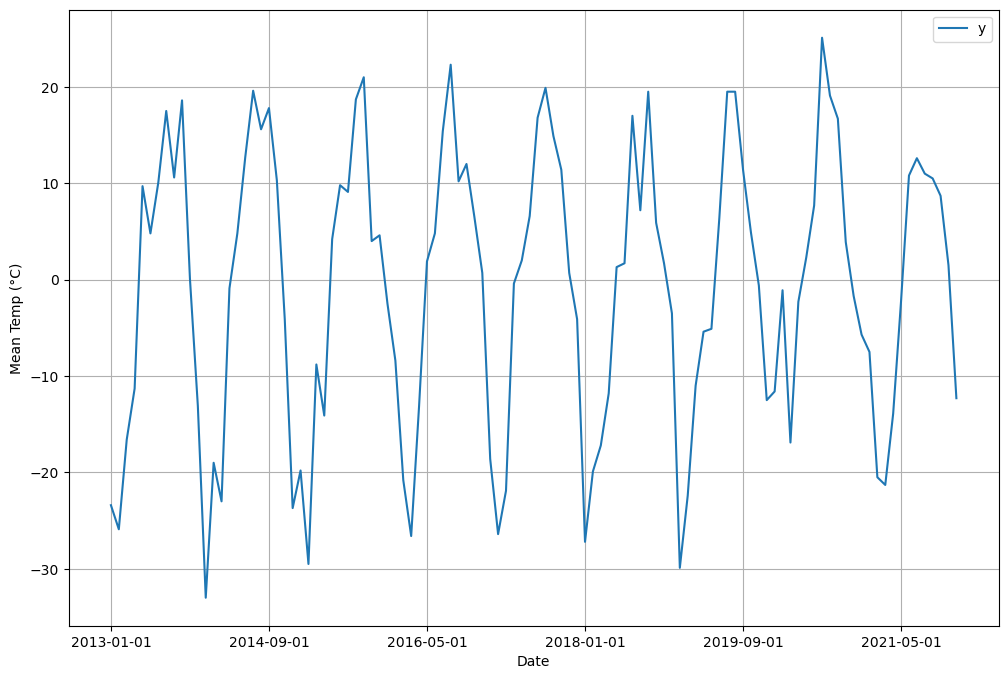

In [82]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataMO = pd.read_csv('FinalON.csv')

# Filter data for the specified station and column
prophet_mean_temp_moosone = dataMO[dataMO['Station Name'] == 'Moosone'][['Date', 'Mean Temp (Â°C)']]

# Reset index to avoid issues with Prophet
prophet_mean_temp_moosone.reset_index(drop=True, inplace=True)

# Rename columns to 'ds' and 'y'
prophet_mean_temp_moosone.rename(columns={'Date': 'ds', 'Mean Temp (Â°C)': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_mean_temp_moosone.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Mean Temp (°C)')
ax.set_xlabel('Date')
plt.grid()
plt.show()


In [83]:
model.fit(prophet_mean_temp_moosone)


18:10:22 - cmdstanpy - INFO - Chain [1] start processing
18:10:22 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,-1.105533,-27.273040,-13.085135,-1.105533,-1.105533,-19.452494,-19.452494,-19.452494,-19.452494,-19.452494,-19.452494,0.0,0.0,0.0,-20.558027
1,2013-02-01,-1.093896,-28.439322,-14.135775,-1.093896,-1.093896,-20.254069,-20.254069,-20.254069,-20.254069,-20.254069,-20.254069,0.0,0.0,0.0,-21.347966
2,2013-03-01,-1.083386,-26.138111,-11.535898,-1.083386,-1.083386,-17.583691,-17.583691,-17.583691,-17.583691,-17.583691,-17.583691,0.0,0.0,0.0,-18.667077
3,2013-04-01,-1.071749,-15.226662,-1.559683,-1.071749,-1.071749,-7.470019,-7.470019,-7.470019,-7.470019,-7.470019,-7.470019,0.0,0.0,0.0,-8.541768
4,2013-05-01,-1.060488,-5.704952,8.312618,-1.060488,-1.060488,2.705366,2.705366,2.705366,2.705366,2.705366,2.705366,0.0,0.0,0.0,1.644878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,0.206990,10.267767,24.226571,0.206984,0.206995,17.227212,17.227212,17.227212,17.227212,17.227212,17.227212,0.0,0.0,0.0,17.434201
116,2022-09-01,0.218612,8.274396,22.262899,0.218606,0.218619,15.344055,15.344055,15.344055,15.344055,15.344055,15.344055,0.0,0.0,0.0,15.562667
117,2022-10-01,0.229860,3.070645,16.710804,0.229853,0.229868,9.371915,9.371915,9.371915,9.371915,9.371915,9.371915,0.0,0.0,0.0,9.601775
118,2022-11-01,0.241483,-4.615767,8.837243,0.241474,0.241492,1.494514,1.494514,1.494514,1.494514,1.494514,1.494514,0.0,0.0,0.0,1.735997


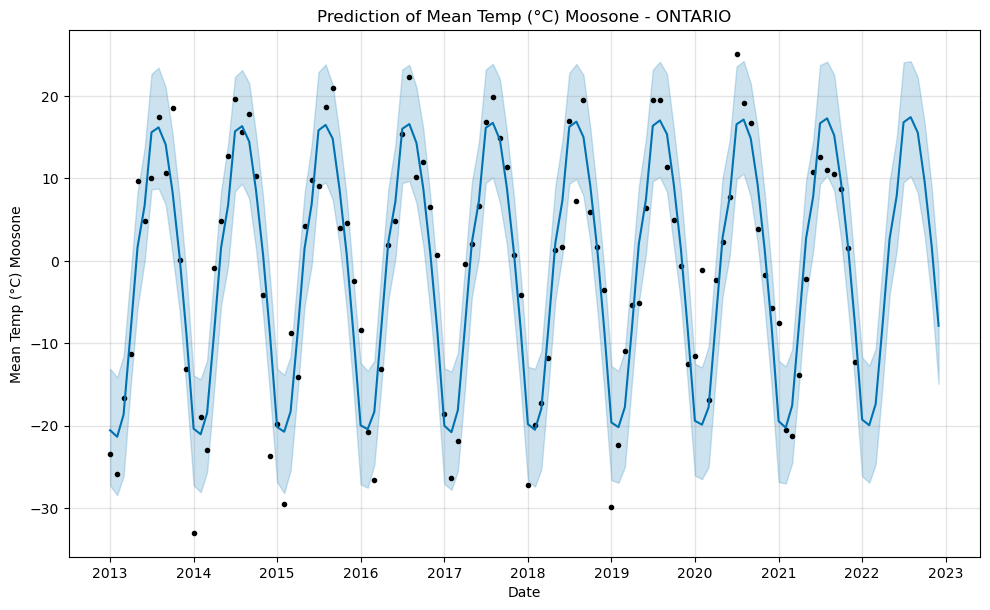

RMSE: 5.4398273251162435
MAE: 4.243799747924728
MSE: 29.591721327081345


In [85]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Mean Temp (°C) Moosone - ONTARIO")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C) Moosone")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_mean_temp_moosone['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# PEI

# St. Peters Bay Mean Temp (°C)

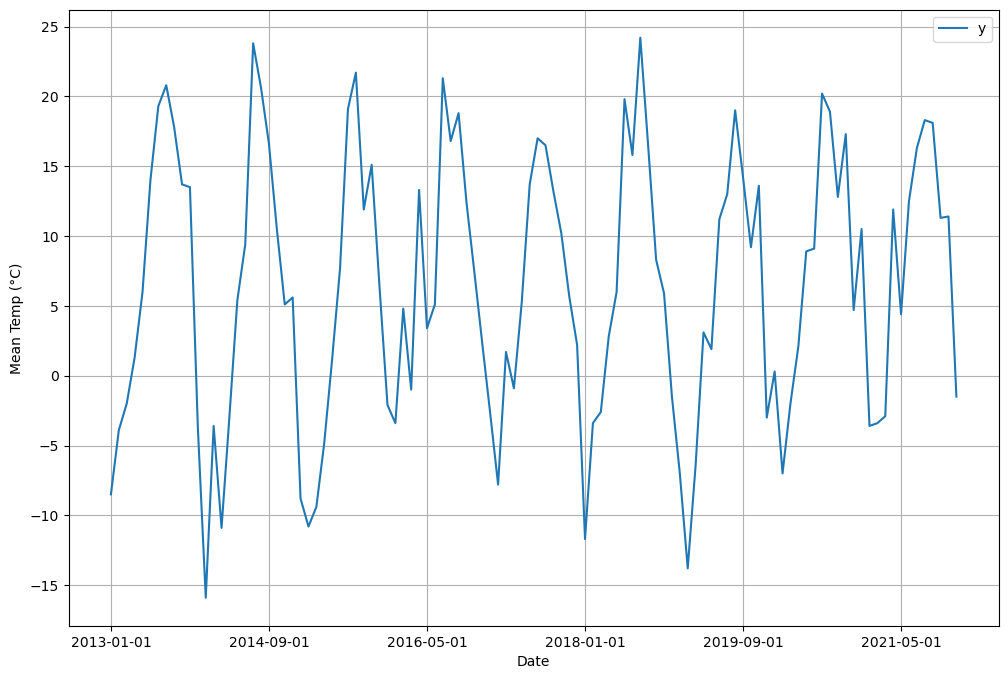

In [86]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataPP = pd.read_csv('FinalPE.csv')

# Filter data for the specified station and column
prophet_mean_temp_stpeters = dataPP[dataPP['Station Name'] == 'St. Peters Bay'][['Date', 'Mean Temp (Â°C)']]

# Rename columns to 'ds' and 'y'
prophet_mean_temp_stpeters.rename(columns={'Date': 'ds', 'Mean Temp (Â°C)': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_mean_temp_stpeters.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Mean Temp (°C)')
ax.set_xlabel('Date')
plt.grid()
plt.show()
    

In [87]:

model.fit(prophet_mean_temp_stpeters)


18:11:43 - cmdstanpy - INFO - Chain [1] start processing
18:11:43 - cmdstanpy - INFO - Chain [1] done processing


In [88]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,6.288854,-12.181854,-2.459114,6.288854,6.288854,-13.730908,-13.730908,-13.730908,-13.730908,-13.730908,-13.730908,0.0,0.0,0.0,-7.442054
1,2013-02-01,6.295809,-11.254306,-0.889290,6.295809,6.295809,-12.315729,-12.315729,-12.315729,-12.315729,-12.315729,-12.315729,0.0,0.0,0.0,-6.019920
2,2013-03-01,6.302092,-8.900387,0.644490,6.302092,6.302092,-10.499781,-10.499781,-10.499781,-10.499781,-10.499781,-10.499781,0.0,0.0,0.0,-4.197689
3,2013-04-01,6.309047,-2.175764,7.475399,6.309047,6.309047,-3.686595,-3.686595,-3.686595,-3.686595,-3.686595,-3.686595,0.0,0.0,0.0,2.622452
4,2013-05-01,6.315778,-0.381818,8.952733,6.315778,6.315778,-1.928971,-1.928971,-1.928971,-1.928971,-1.928971,-1.928971,0.0,0.0,0.0,4.386807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,7.073936,15.398235,25.251583,7.073936,7.073936,13.042098,13.042098,13.042098,13.042098,13.042098,13.042098,0.0,0.0,0.0,20.116034
116,2022-09-01,7.080892,11.178777,20.782040,7.080892,7.080892,8.825801,8.825801,8.825801,8.825801,8.825801,8.825801,0.0,0.0,0.0,15.906693
117,2022-10-01,7.087623,7.133143,16.998804,7.087623,7.087623,5.290834,5.290834,5.290834,5.290834,5.290834,5.290834,0.0,0.0,0.0,12.378457
118,2022-11-01,7.094579,3.890722,13.162159,7.094579,7.094579,1.525869,1.525869,1.525869,1.525869,1.525869,1.525869,0.0,0.0,0.0,8.620447


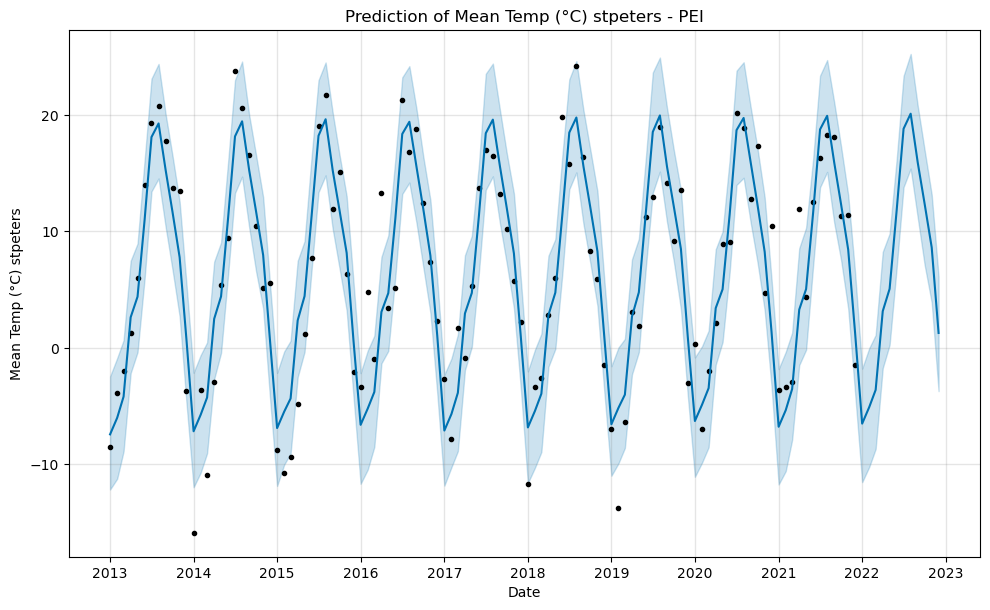

RMSE: 3.768549845078652
MAE: 3.029119063553652
MSE: 14.201967934842333


In [89]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Mean Temp (°C) stpeters - PEI")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C) stpeters")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_mean_temp_stpeters['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# Summerside Transportation

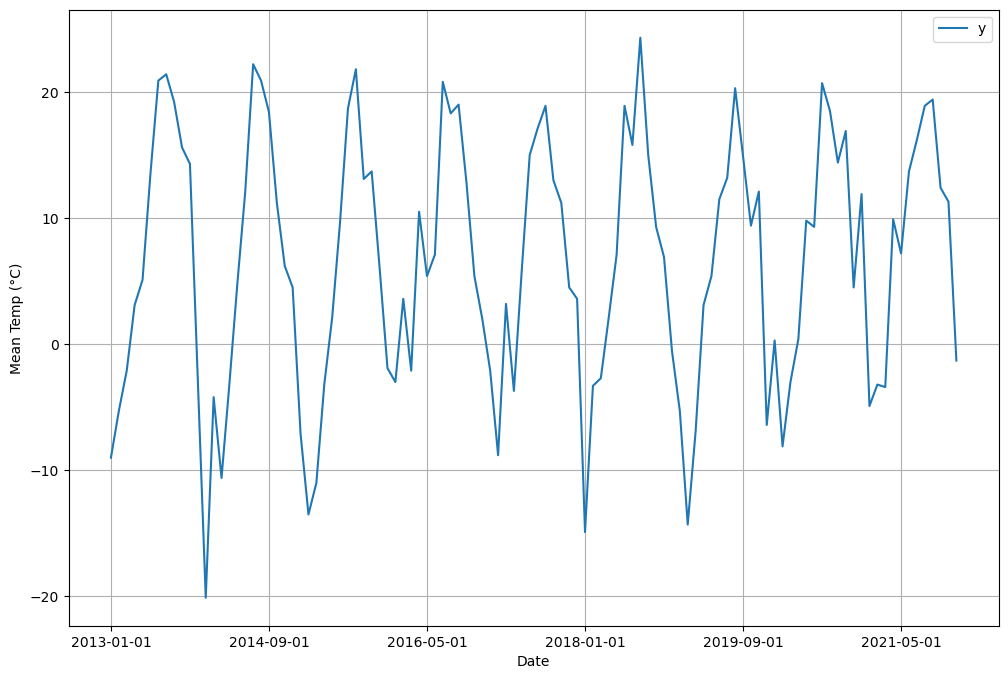

In [90]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataET = pd.read_csv('FinalPE.csv')

# Filter data for the specified station and column
prophet_mean_temp_Summerside = dataET[dataET['Station Name'] == 'Summerside'][['Date', 'Mean Temp (Â°C)']]

# Rename columns to 'ds' and 'y'
prophet_mean_temp_Summerside.rename(columns={'Date': 'ds', 'Mean Temp (Â°C)': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_mean_temp_Summerside.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Mean Temp (°C)')
ax.set_xlabel('Date')
plt.grid()
plt.show()

In [91]:
model.fit(prophet_mean_temp_Summerside)


18:12:45 - cmdstanpy - INFO - Chain [1] start processing
18:12:45 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,6.160487,-13.372382,-3.425786,6.160487,6.160487,-14.436533,-14.436533,-14.436533,-14.436533,-14.436533,-14.436533,0.0,0.0,0.0,-8.276046
1,2013-02-01,6.172949,-12.517926,-2.472896,6.172949,6.172949,-13.297973,-13.297973,-13.297973,-13.297973,-13.297973,-13.297973,0.0,0.0,0.0,-7.125024
2,2013-03-01,6.184204,-9.858005,-0.075956,6.184204,6.184204,-10.958112,-10.958112,-10.958112,-10.958112,-10.958112,-10.958112,0.0,0.0,0.0,-4.773908
3,2013-04-01,6.196665,-3.097532,6.336951,6.196665,6.196665,-4.603104,-4.603104,-4.603104,-4.603104,-4.603104,-4.603104,0.0,0.0,0.0,1.593562
4,2013-05-01,6.208725,0.259721,10.181705,6.208725,6.208725,-0.876660,-0.876660,-0.876660,-0.876660,-0.876660,-0.876660,0.0,0.0,0.0,5.332065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,7.567008,16.598272,25.796944,7.567008,7.567008,13.642259,13.642259,13.642259,13.642259,13.642259,13.642259,0.0,0.0,0.0,21.209266
116,2022-09-01,7.579469,12.370807,21.925066,7.579469,7.579469,9.475539,9.475539,9.475539,9.475539,9.475539,9.475539,0.0,0.0,0.0,17.055008
117,2022-10-01,7.591528,8.024086,18.589318,7.591528,7.591528,5.691463,5.691463,5.691463,5.691463,5.691463,5.691463,0.0,0.0,0.0,13.282991
118,2022-11-01,7.603990,3.782509,13.982472,7.603990,7.603990,1.168636,1.168636,1.168636,1.168636,1.168636,1.168636,0.0,0.0,0.0,8.772625


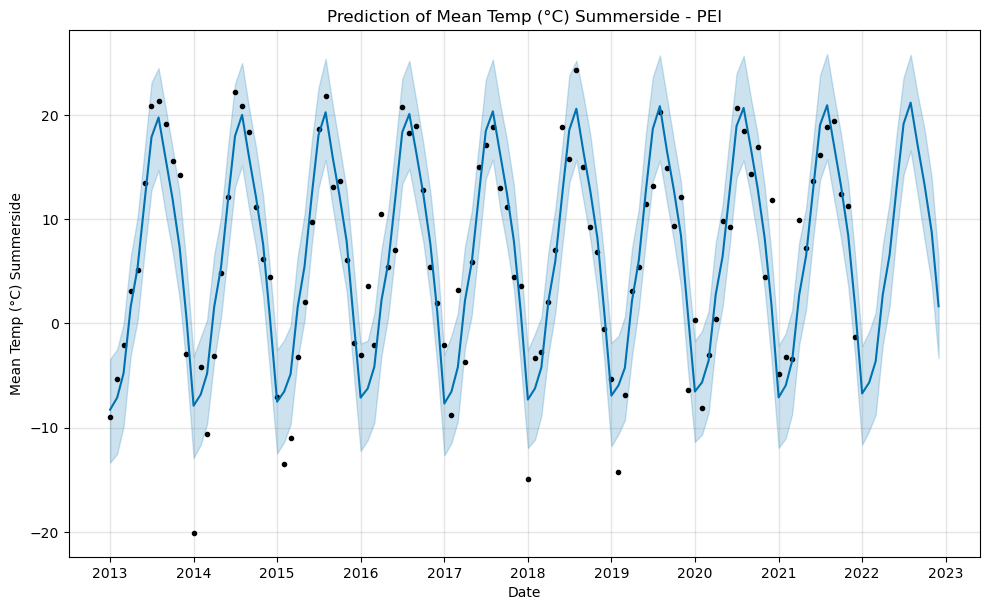

RMSE: 3.8408393631126176
MAE: 3.011879382413307
MSE: 14.752047013235337


In [93]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Mean Temp (°C) Summerside - PEI")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C) Summerside")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
actual = prophet_mean_temp_Summerside['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

# East Point Mean Temp (°C)

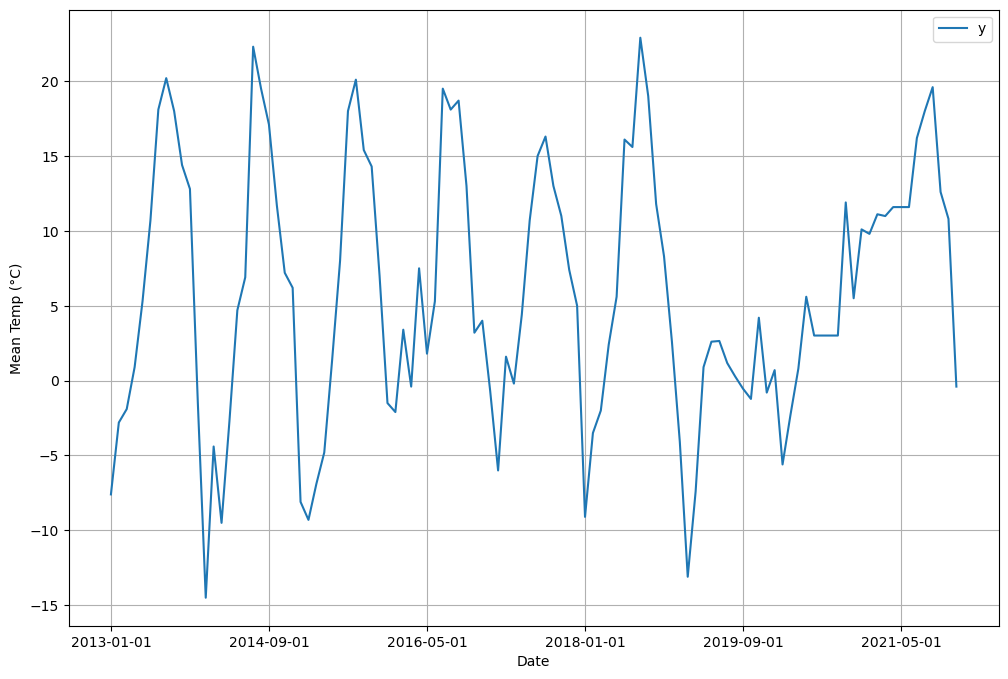

In [94]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your DataFrame
dataAT = pd.read_csv('FinalPE.csv')

# Filter data for the specified station and column
prophet_mean_temp_eastpoint = dataAT[dataAT['Station Name'] == 'East Point'][['Date', 'Mean Temp (Â°C)']]

# Reset index to avoid issues with Prophet
prophet_mean_temp_eastpoint.reset_index(drop=True, inplace=True)

# Rename columns to 'ds' and 'y'
prophet_mean_temp_eastpoint.rename(columns={'Date': 'ds', 'Mean Temp (Â°C)': 'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()

# Plot the data
ax = prophet_mean_temp_eastpoint.plot(x='ds', y='y', figsize=(12, 8))
ax.set_ylabel('Mean Temp (°C)')
ax.set_xlabel('Date')
plt.grid()
plt.show()


In [95]:
model.fit(prophet_mean_temp_eastpoint)


18:13:58 - cmdstanpy - INFO - Chain [1] start processing
18:13:58 - cmdstanpy - INFO - Chain [1] done processing


In [96]:
#Creating a dataframe of length 1 Year and saving it to a varibale named future
future=model.make_future_dataframe(periods=12, freq='MS')
#Predicitng the next year with model and storing it into a variable named Predictions.
predictions = model.predict(future)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,5.036374,-12.122124,2.138167,5.036374,5.036374,-9.768955,-9.768955,-9.768955,-9.768955,-9.768955,-9.768955,0.0,0.0,0.0,-4.732581
1,2013-02-01,5.055392,-11.251939,2.508077,5.055392,5.055392,-9.221750,-9.221750,-9.221750,-9.221750,-9.221750,-9.221750,0.0,0.0,0.0,-4.166358
2,2013-03-01,5.072570,-10.078283,4.253329,5.072570,5.072570,-7.805240,-7.805240,-7.805240,-7.805240,-7.805240,-7.805240,0.0,0.0,0.0,-2.732670
3,2013-04-01,5.091589,-6.051957,8.144000,5.091589,5.091589,-4.070965,-4.070965,-4.070965,-4.070965,-4.070965,-4.070965,0.0,0.0,0.0,1.020623
4,2013-05-01,5.106960,-3.752451,10.776570,5.106960,5.106960,-1.159039,-1.159039,-1.159039,-1.159039,-1.159039,-1.159039,0.0,0.0,0.0,3.947921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,6.838313,8.853383,23.187318,6.837114,6.839532,9.382680,9.382680,9.382680,9.382680,9.382680,9.382680,0.0,0.0,0.0,16.220993
116,2022-09-01,6.854197,7.832953,21.657253,6.852773,6.855698,7.720007,7.720007,7.720007,7.720007,7.720007,7.720007,0.0,0.0,0.0,14.574203
117,2022-10-01,6.869568,4.722445,19.042766,6.867881,6.871357,5.104226,5.104226,5.104226,5.104226,5.104226,5.104226,0.0,0.0,0.0,11.973794
118,2022-11-01,6.885452,1.347267,15.139243,6.883493,6.887556,1.473753,1.473753,1.473753,1.473753,1.473753,1.473753,0.0,0.0,0.0,8.359205


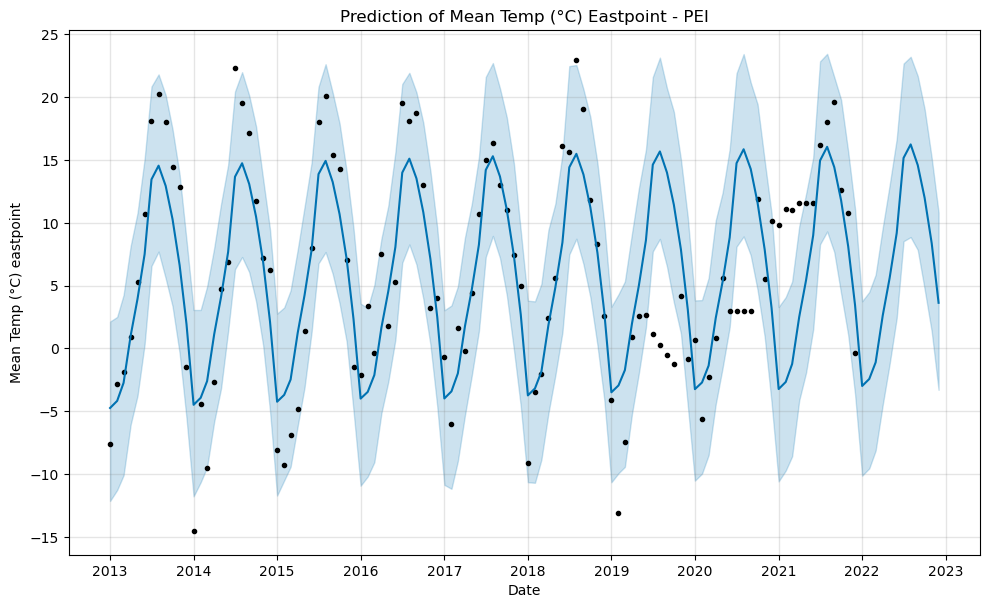

RMSE: 5.521258647136208
MAE: 4.089923774097867
MSE: 30.484297048576348


In [97]:
# Plotting the the predicted values by model
model.plot(predictions)
plt.title("Prediction of Mean Temp (°C) Eastpoint - PEI")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°C) eastpoint")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

actual = prophet_mean_temp_eastpoint['y']
predicted = predictions['yhat'][:len(actual)]  # Only considering predictions for the actual data period
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)